# FarmeTech - Visão computacional

Projeto tem como objetivo mostra a eficiência da arquitetura YOLO, uma arquitetura de visão computacional. Vamos abordar somente a detecção de objetos.

Para fins demostrativos vamos utilizar um dataset de gatos e cachorros, **mas, é bom lembrar que o mesmo modelo treinado com o devido dataset pode ser aplicado para outra classes de objetos.**

In [ ]:
# Clonando o repositório do YOLO v5

!git clone https://github.com/ultralytics/yolov5

In [1]:
# Garantindo que estamos no diretório correto que foi clonado no comando anterior

%cd yolov5/

/home/henrique/fiap/fase-06/yolov5


In [ ]:
# Instalando depedências do repositório YOLO v5

%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


## Carregando libs e inicialização de variáveis

Vamos carregar as libs necessárias para manipulação dos dados e visualizações tanto de imagens quando de gráficos utilizados no comparativo.

In [ ]:
# Bibliotecas padrão
import os
from pathlib import Path
import yaml

# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas dde manipulação de imagens
import cv2

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


In [ ]:
# define caminho da pasta do meu projeto no google drive

DRIVE_PATH = '../farmtech_yolo_project'

# Caminho para o dataset principal
dataset_path = os.path.join(DRIVE_PATH, 'dataset')

# Caminho para as imagens de teste
test_images_path = os.path.join(DRIVE_PATH, 'dataset', 'test', 'images')

## Visualizando as imagens do dataset

Para entender se o nosso dataset está sendo carregado corretamente, vamos imprimir amostra aleatórias das imagens contidas no dataset

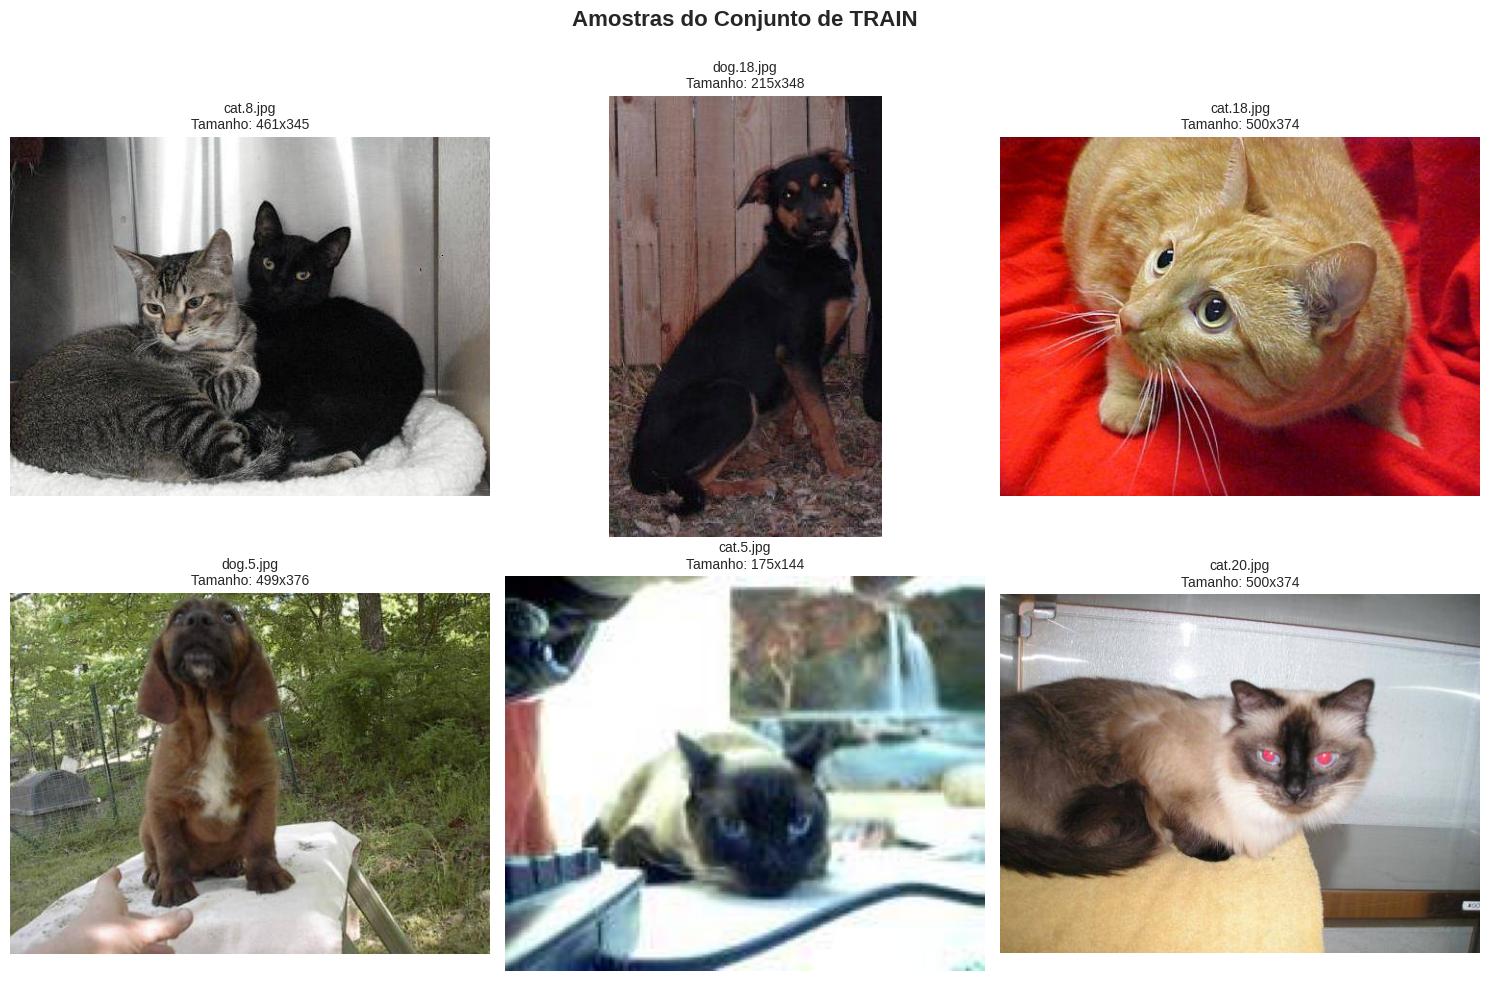

In [4]:
# visualizar amostra aleatória das imagens do dataset

import random

def visualize_samples(dataset_path, split='train', num_samples=6):
    """Visualiza amostras aleatórias do dataset"""
    img_dir = os.path.join(dataset_path, split, 'images')
    images = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Selecionar amostras aleatórias
    samples = random.sample(images, min(num_samples, len(images)))

    # Criar grid de visualização
    cols = 3
    rows = (len(samples) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    for idx, img_name in enumerate(samples):
        img_path = os.path.join(img_dir, img_name)
        # Ler imagem com OpenCV e converter de BGR para RGB
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Obter dimensões da imagem
        height, width = img.shape[:2]

        axes[idx].imshow(img)
        axes[idx].set_title(f'{img_name}\nTamanho: {width}x{height}', fontsize=10)
        axes[idx].axis('off')

    # Ocultar eixos não utilizados
    for idx in range(len(samples), len(axes)):
        axes[idx].axis('off')

    plt.suptitle(f'Amostras do Conjunto de {split.upper()}', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

# Visualizar amostras de treinamento
visualize_samples(dataset_path, 'train', num_samples=6)

## Configuração base do modelo

Vamos criar um arquivo dataset.yml na raiz do diretório do yaml.

Esse arquivos contém configurações base que o modelo utilizará no treinamento. Por exemplo: o caminho de saída dos dataset de cada etapa, o nomes e quantidade de classes. 

In [38]:
# Definir as classes
CLASS_NAMES = ['cachorro', 'gato']

# Criar arquivo YAML de configuração
yaml_content = {
    'path': dataset_path,
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': len(CLASS_NAMES),  # número de classes
    'names': CLASS_NAMES
}

# Salvar arquivo YAML
yaml_path = 'dataset.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(yaml_content, f, default_flow_style=False)

print("✅ Arquivo de configuração criado: dataset.yaml\n")
print("📋 Conteúdo do arquivo:\n")
with open(yaml_path, 'r') as f:
    print(f.read())

✅ Arquivo de configuração criado: dataset.yaml

📋 Conteúdo do arquivo:

names:
- cachorro
- gato
nc: 2
path: ../farmtech_yolo_project/dataset
test: test/images
train: train/images
val: valid/images



## Treinando o Modelo

Vamos treinar 2 modelos, um com 30 épocas e outro com 60 épocas.

Épocas são a quantidade de vezes que o dataset completo passa pelo algoritmo.

**Vamos resaltar alguns parametro do comando de treinamento**:
--img 640: As imagens serão redimencionadas onde o lado maior da imagem será igual a 640, assim mantendo a proporção.
--epochs 30: Quantidade de épocas
--data dataset.yml: Nosso arquivo de configuração base que criamos acima.
--name: nome do treinamento (os arquivos de output e métricas do modelo terão esse nome)

### Treinar o modelo de 30 épocas.

In [5]:
!python train.py --img 640 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --name farmtech_30epochs --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=farmtech_30epochs, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw

### Treinar o modelo de 60 épocas.

In [8]:
!python train.py --img 640 --batch 16 --epochs 60 --data dataset.yaml --weights yolov5s.pt --name farmtech_60epochs --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=farmtech_60epochs, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw

### Vamos avaliar as métricas de treinamento do modelo

Ao rodar o treinamentos um arquivo de resultados será criado contendo as métricas de treinamento.

Arquivo de resultados você encontra em: yolov5/runs/train/${nome_do_treinamento}

In [8]:
# Caminho dos resultados
results_path_30 = 'runs/train/farmtech_30epochs'

# Ler arquivo de resultados CSV
results_csv_30 = os.path.join(results_path_30, 'results.csv')
df_results_30 = pd.read_csv(results_csv_30)
df_results_30.columns = df_results_30.columns.str.strip()  # Remover espaços extras

print("📊 Métricas Finais (30 épocas):\n")
print(df_results_30.tail())


# Caminho dos resultados
results_path_60 = 'runs/train/farmtech_60epochs'

# Ler arquivo de resultados CSV
results_csv_60 = os.path.join(results_path_60, 'results.csv')
df_results_60 = pd.read_csv(results_csv_60)
df_results_60.columns = df_results_60.columns.str.strip()

print("📊 Métricas Finais (60 épocas):\n")
print(df_results_60.tail())


📊 Métricas Finais (30 épocas):

    epoch  train/box_loss  train/obj_loss  train/cls_loss  metrics/precision  \
25     25        0.036730        0.023632        0.013197            0.49298   
26     26        0.044977        0.023438        0.012329            0.69898   
27     27        0.050793        0.024297        0.016194            0.55597   
28     28        0.048998        0.024483        0.013043            0.72253   
29     29        0.042908        0.022090        0.013701            0.65964   

    metrics/recall  metrics/mAP_0.5  metrics/mAP_0.5:0.95  val/box_loss  \
25         0.67500          0.59151               0.29266      0.013483   
26         0.66812          0.67646               0.34921      0.012615   
27         0.66514          0.66244               0.32935      0.012731   
28         0.55000          0.66332               0.32527      0.012446   
29         0.55191          0.65750               0.34556      0.012068   

    val/obj_loss  val/cls_loss    x/

## Considerações sobre as métricas de treinamento.

IMPOTANTE, explicações sobre algumas métricas

**Diferença entre train/obj_loss e box_loss**:
**train/obj_loss**: identifica a presença do objeto, enquanto o **box_loss** mede a qualidade da marcação.

**metrics/mAP_0.5**:
(IoU = 0.5), isso significa que a caixa delimitadora predita pelo modelo tem 50% de sobreposição sobre caixa delimitadora real, especifícas no arquivos labels.
**metrics/mAP_0.5:0.95**:
(IoU = 0.5), isso que modelo tem um precisão de 50% em marca o objeto de forma correta, com um sobreposição de 50% a 95%.

---

### Modelo de 30 Épocas

Podemos obersar que:
- **não teve overfitting** pois o **val/box_loss, val/obj_loss e val/cls_loss** vai diminuindo progressivamente ao avançar as épocas de treinamento.
- **train/cls_loss** de  0.013197 no diz que o modelo está bom em acertar a classe (train/cls_loss <= 0.01 - modelo bom)
- **O train/box_loss** se manteve entre 0.03 e 0.05, isso que o modelo tem um boa precisão ao marcar o objeto com a caixa delimitadora.
- **train/obj_los** por volta de 0.02, está detectando objetos de forma confíavel, diferente da métrica acima, aqui indica que o objeto apenas foi identificado na imagem, e na métrica acima indica a assertividade na marcação do objeto.
- **precisão (0.72)** poucos falsos positivos e **recall (0.55)** baixo, indica a ocorrência de alguns falsos negativos.
- **mAP@0.5 (0.66)** e o **mAP@0.5:0.95 (0.34)** mostra um

### Modelo de 60 Épocas
- **não teve overfitting**, pois o val/box_loss, val/obj_loss e val/cls_loss continuam diminuindo rogressivamente ao avançar as épocas de treinamento.
- **train/cls_loss de 0.005467** indica que o modelo está excelente em acertar a classe, com erro de classificação muito baixo (train/cls_loss <= 0.01 - modelo bom).
- **train/box_loss** variando entre 0.02 e 0.03 mostra que o modelo tem alta precisão na marcação das caixas delimitadoras.
- **train/obj_loss** por volta de 0.019 demonstra que o modelo está detectando os objetos de forma estável e confiável.
- **precisão (0.82)** mostra poucos falsos positivos, e o **recall (0.70)** mais alto em relação ao modelo de 30 épocas indica que o modelo detecta mais objetos reais e perde menos ocorrências.
- **mAP@0.5 (0.74)** e o **mAP@0.5:0.95 (0.56)** representam uma melhoria significativa na capacidade de generalização, mostrando que o modelo se tornou mais robusto e consistente após o treinamento prolongado.




📊 Comparação de Métricas entre 30 e 60 Épocas:

              30 Épocas  60 Épocas  Diferença (%)
Precision       0.65964    0.73292          11.11
Recall          0.55191    0.60000           8.71
mAP@0.5         0.65750    0.68875           4.75
mAP@0.5:0.95    0.34556    0.47692          38.01


/tmp/ipykernel_5982/1075065849.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df_comparison.index, rotation=45, ha='right')


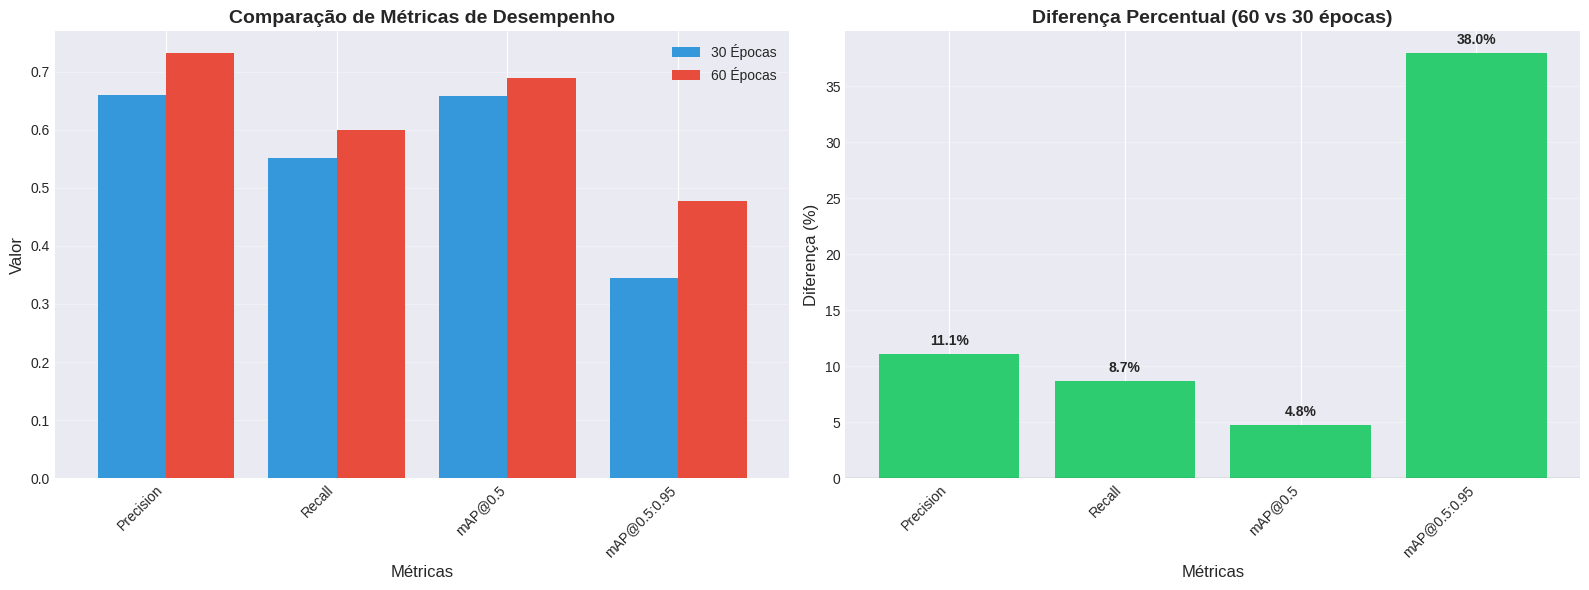

In [9]:
# Extrair métricas finais de ambos os treinamentos
metrics_30 = df_results_30.iloc[-1]
metrics_60 = df_results_60.iloc[-1]

# Criar DataFrame comparativo
comparison_metrics = ['metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95']
comparison_data = {
    '30 Épocas': [metrics_30[m] for m in comparison_metrics],
    '60 Épocas': [metrics_60[m] for m in comparison_metrics]
}

df_comparison = pd.DataFrame(
    comparison_data,
    index=['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
)

# Calcular diferença percentual
df_comparison['Diferença (%)'] = ((df_comparison['60 Épocas'] - df_comparison['30 Épocas']) / df_comparison['30 Épocas'] * 100).round(2)

print("📊 Comparação de Métricas entre 30 e 60 Épocas:\n")
print(df_comparison)

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras agrupadas
df_comparison[['30 Épocas', '60 Épocas']].plot(
    kind='bar',
    ax=axes[0],
    color=['#3498db', '#e74c3c'],
    width=0.8
)
axes[0].set_title('Comparação de Métricas de Desempenho', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Métricas', fontsize=12)
axes[0].set_ylabel('Valor', fontsize=12)
axes[0].legend(['30 Épocas', '60 Épocas'])
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(df_comparison.index, rotation=45, ha='right')

# Gráfico de diferença percentual
colors_diff = ['#2ecc71' if x > 0 else '#e74c3c' for x in df_comparison['Diferença (%)']]
axes[1].bar(df_comparison.index, df_comparison['Diferença (%)'], color=colors_diff)
axes[1].set_title('Diferença Percentual (60 vs 30 épocas)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Métricas', fontsize=12)
axes[1].set_ylabel('Diferença (%)', fontsize=12)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(df_comparison.index, rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(df_comparison['Diferença (%)']):
    axes[1].text(i, v + 0.5 if v > 0 else v - 0.5, f'{v:.1f}%',
                ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

## Progressão do treinamentos

Os gráficos abaixo mostra a progressão do modelo durante o treinamento, a medida que as épocas vão avançando

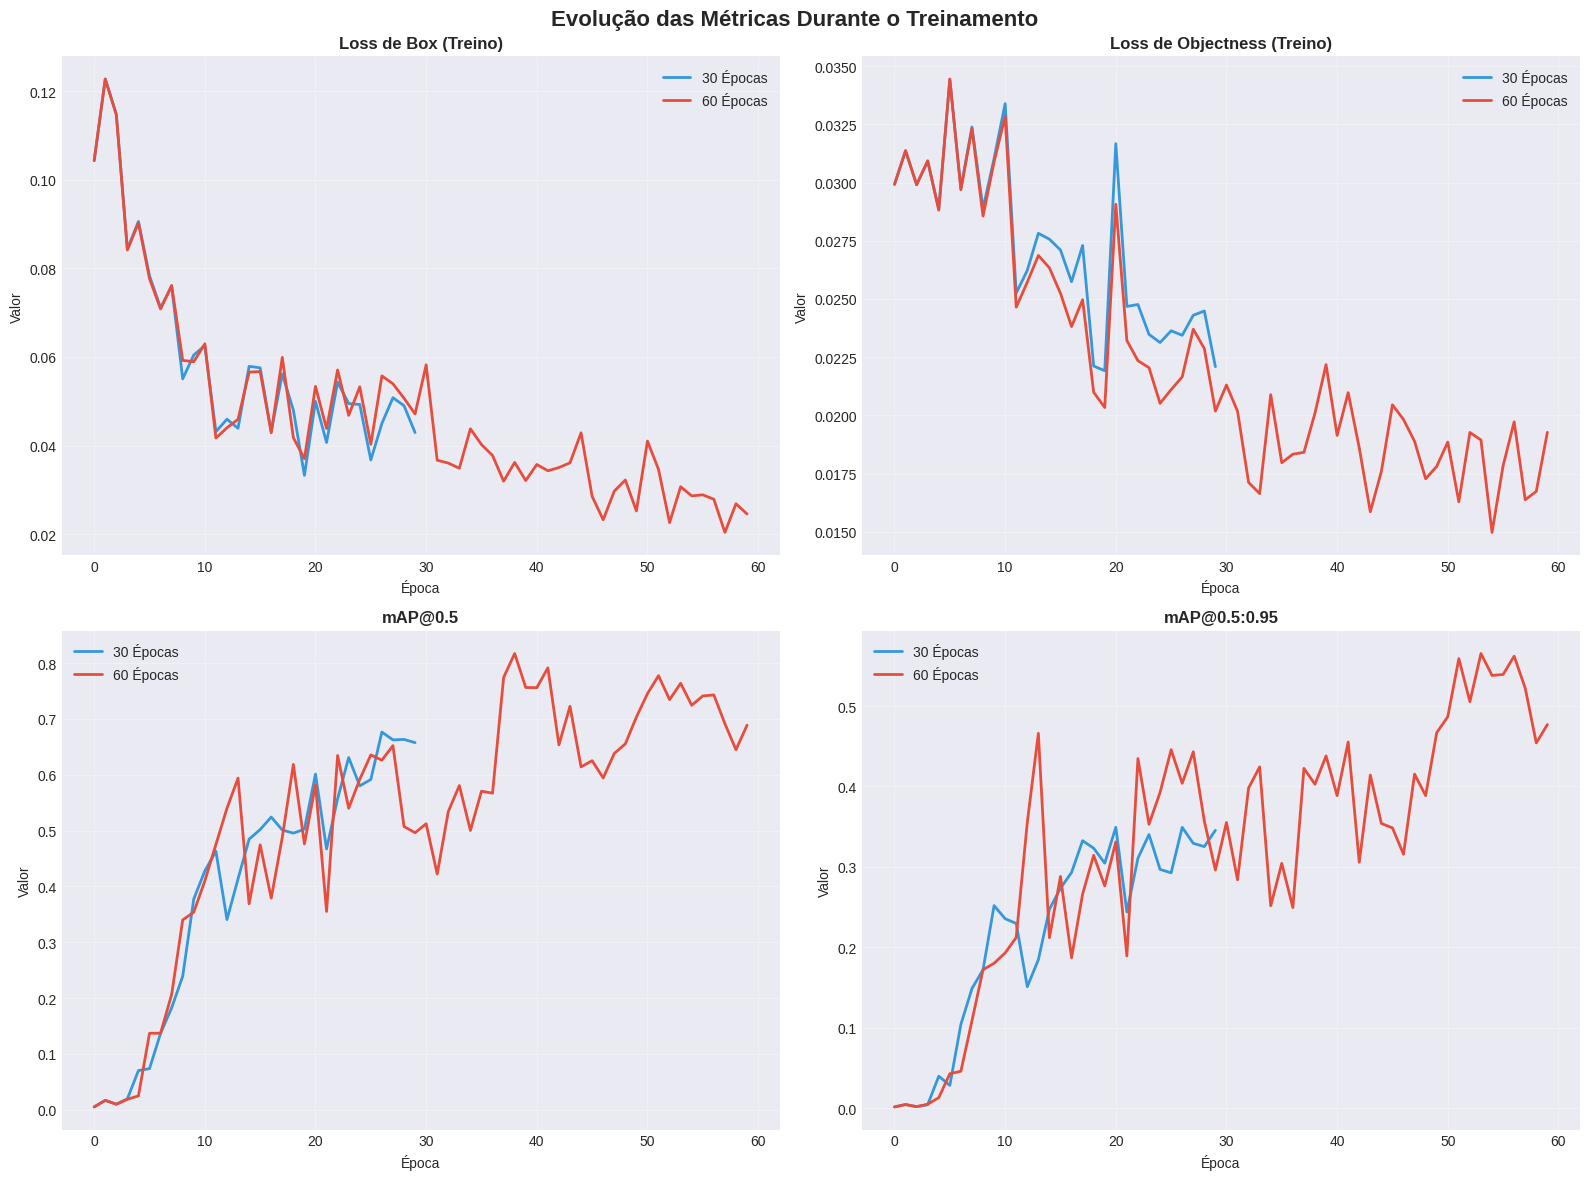

In [ ]:
# Preparar dados para visualização
df_results_30_plot = df_results_30.copy()
df_results_30_plot['epochs'] = 30
df_results_30_plot['experiment'] = '30 Épocas'
df_results_60_plot = df_results_60.copy()
df_results_60_plot['epochs'] = 60
df_results_60_plot['experiment'] = '60 Épocas'

# Criar gráficos de evolução
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_to_plot = [
    ('train/box_loss', 'Loss de Box (Treino)'),
    ('train/obj_loss', 'Loss de Objectness (Treino)'),
    ('metrics/mAP_0.5', 'mAP@0.5'),
    ('metrics/mAP_0.5:0.95', 'mAP@0.5:0.95')
]

for idx, (metric, title) in enumerate(metrics_to_plot):
    row = idx // 2
    col = idx % 2

    axes[row, col].plot(df_results_30_plot.index, df_results_30_plot[metric],
                       label='30 Épocas', linewidth=2, color='#3498db')
    axes[row, col].plot(df_results_60_plot.index, df_results_60_plot[metric],
                       label='60 Épocas', linewidth=2, color='#e74c3c')

    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Época', fontsize=10)
    axes[row, col].set_ylabel('Valor', fontsize=10)
    axes[row, col].legend()
    axes[row, col].grid(alpha=0.3)

plt.suptitle('Evolução das Métricas Durante o Treinamento', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Validando os modelos

Aqui estamos usando o dataset de test para validar os modelos

In [ ]:
# Validando o modelo de 30 épocas

!python val.py \
    --weights runs/train/farmtech_30epochs/weights/best.pt \
    --data dataset.yaml \
    --img 640 \
    --task test \
    --name test_30epochs \
    --verbose


val: data=dataset.yaml, weights=['runs/train/farmtech_30epochs/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=test_30epochs, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

Fusing layers... 
Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /home/henrique/fiap/fase-06/farmtech_yolo_project/dataset/test/la
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /home/henrique/fiap/fase-06/farmtech_yolo_project/dataset/test/la
                 Class     Images  Instances          P          R      mAP50   
                 Class     Images  Instances          P          R    

In [ ]:
# Validando o modelo de 60 épocas

!python val.py \
    --weights runs/train/farmtech_60epochs/weights/best.pt \
    --data dataset.yaml \
    --img 640 \
    --task test \
    --name test_60epochs \
    --verbose


val: data=dataset.yaml, weights=['runs/train/farmtech_60epochs/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=test_60epochs, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

Fusing layers... 
Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /home/henrique/fiap/fase-06/farmtech_yolo_project/dataset/test/la
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /home/henrique/fiap/fase-06/farmtech_yolo_project/dataset/test/la
                 Class     Images  Instances          P          R      mAP50   
                 Class     Images  Instances          P          R    

## Dectando obejtos nas imagens

Finalmente vamos utilizar os modelos treinados e validados para identificar os objetos nas imagens, e mostrar as marcações dos objetos.

Aqui também através das imagens renderizadas vamos comparar um modelo com o outro.

---

### Como funciona a detecção.

O modelo vai fazer várias marcações nas imagens, e atribuir pontuações para cada marcação, com isso podemos colocar crítérios para que somente marcações que atende a esse crítérios sejam mostradas no resultado.

**--conf: 0.25** aqui mora o segredo, eu estou falando que somente caixas com uma pontuação igual ou superior a 0.25 será mostrada na imagem a qual foi feita a predição. (Essa pontuação é o nível de confiança que o modelo tem que aquele é o obejeto desejado).

**--iou-thres 0.3** ao utilizar essa opção estamos falando ao modelo que somente marcações que tenha no minimo 30% de sobreposição da real, devem ser mostradas.

Primeiro o modelo avalia o **--conf** descarta as marcações que não atende o crítério e depois passa pelo **--iou-thres**, ou seja, é um ajuste fino.

### Usando o modelo de 30 épocas


In [ ]:
!python detect.py \
    --weights runs/train/farmtech_30epochs/weights/best.pt \
    --source "$test_images_path" \
    --img 640 \
    --conf 0.25 \
    # --iou-thres 0.3 \
    --name detect_30epochs \
    --save-txt \
    --save-conf \
    --project runs/detect \
    --exist-ok

detect: weights=['runs/train/farmtech_30epochs/weights/best.pt'], source=../farmtech_yolo_project/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

Fusing layers... 
Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /home/henrique/fiap/fase-06/farmtech_yolo_project/dataset/test/images/cat.33.jpg: 512x640 1 gato, 49.1ms
image 1/8 /home/henrique/fiap/

### Usando o modelo de 60 épocas


In [ ]:
!python detect.py \
    --weights runs/train/farmtech_60epochs/weights/best.pt \
    --source "$test_images_path" \
    --img 640 \
    --conf 0.25 \
    --name detect_60epochs \
    --save-txt \
    --save-conf \
    --project runs/detect \
    --exist-ok

detect: weights=['runs/train/farmtech_60epochs/weights/best.pt'], source=../farmtech_yolo_project/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=detect_60epochs, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.3 torch-2.8.0+cu128 CPU

Fusing layers... 
Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /home/henrique/fiap/fase-06/farmtech_yolo_project/dataset/test/images/cat.33.jpg: 512x640 1 gato, 45.9ms
image 1/8 /home/henrique/fiap/fase-06/farmtech_yolo_project/dataset/test/images/cat.33

### Imprimindo as predições

Vamos imprimir as imagens preditas na detecção e avaliar os 2 modelos

30 épocas: 8 imagens com predição


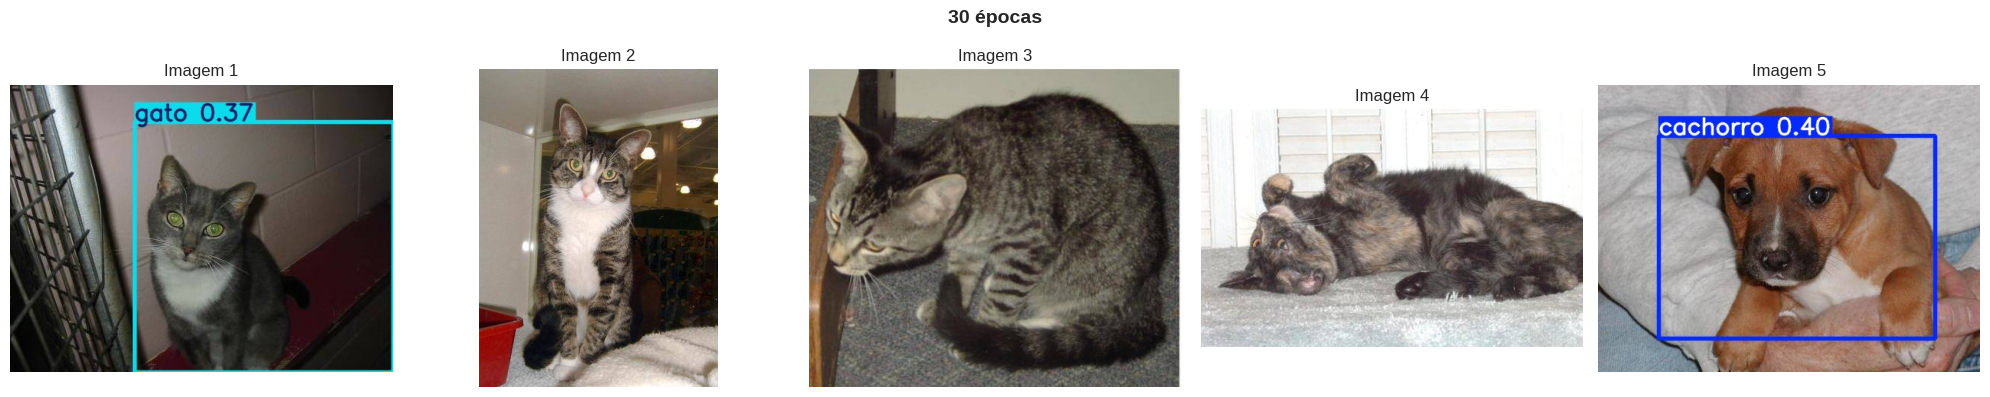

60 épocas: 8 imagens com predição


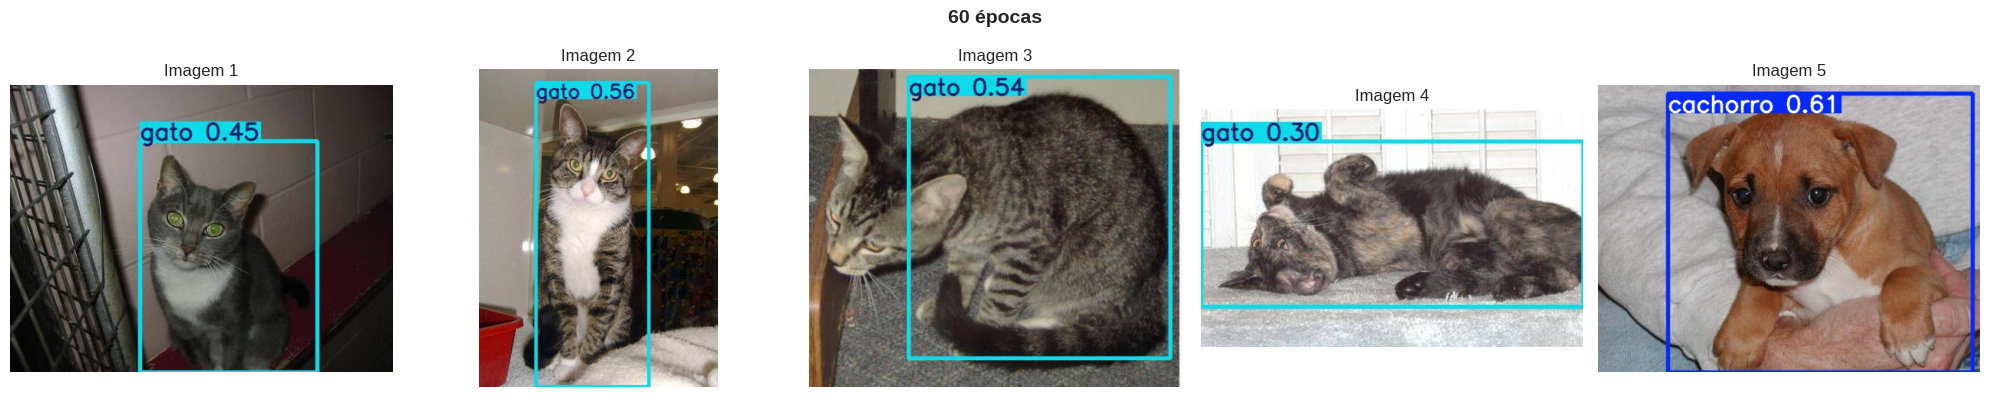

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt

pred_30 = sorted(glob.glob('runs/detect/detect_30epochs/*.jpg'))
pred_60 = sorted(glob.glob('runs/detect/detect_60epochs/*.jpg'))

def show_predictions(images, title):
    print(f"{title}: {len(images)} imagens com predição")
    
    # Criar figura para mostrar as 5 primeiras imagens
    fig, axes = plt.subplots(1, min(5, len(images)), figsize=(20, 4))
    if len(images) == 1:
        axes = [axes]
    
    for idx, img_path in enumerate(images[:5]):
        # Ler e converter imagem de BGR para RGB
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Mostrar imagem
        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f'Imagem {idx+1}')
    
    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Mostrar predições para ambos os modelos
show_predictions(pred_30, "30 épocas")
show_predictions(pred_60, "60 épocas")